# <font color = 'red'> 1、线性拟合问题的最小二乘法 </font>

一组含有实验测量误差的数据 $(x_i,y_i), i = 1, 2, 3 , \cdots$。假设该数据符合一个线性关系: $\hat{y_i} = a x_i$，则最小二乘法要求：所有测量得数据距离此直线最小，即要求下式最小化：

$$
S(a) = \Sigma_i (\hat{y_i} - y_i)^2 = \Sigma_i (a x_i - y_i)^2
$$

上式取最小，可通过令 $\frac{d}{da}S(a) = 0$ 加以保证：

$$
\frac{d}{da}S(a) = \Sigma_i 2x_i(ax_i - y_i) = 0 \\
\Longrightarrow \\
a = \frac{\Sigma_i x_i y_i}{\Sigma_i x_i^2}
$$

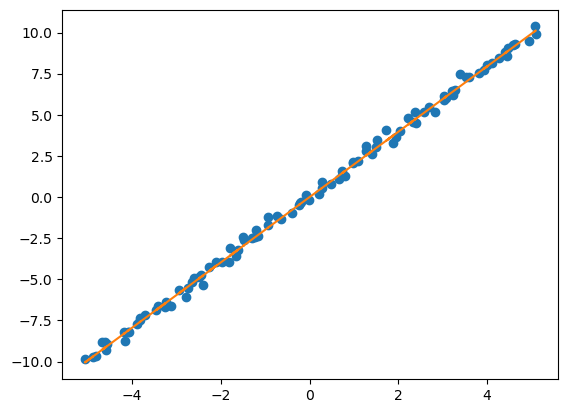

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)
y = 2*x
x = x + 0.1*np.random.randn(100)
y = y + 0.2*np.random.randn(100)

plt.plot(x, y , 'o')

a = np.dot(x,y)/np.dot(x,x)
plt.plot(x,a*x)

# <font color = 'red'> 2、最小二乘法的几何意义 </font>

假设目标函数的形式是 $f(x) = \Sigma_m a_m f_m(x)$，现在根据测得的实验数据 $(x_i, y_i), i = 1, 2, 3, \cdots$ 拟合待定参数 $a_m, m = 1, 2, 3, \cdots$，这个问题便是广义的线性拟合的最小二乘问题。

## <font color = 'blue'> 2.1 最小二乘法的普遍形式 </font>

1 小节中提到的最小二乘拟合只是最小二乘问题中最简化的一种情况。但计算方法仍是一样的：

- 残差：$S(a_1, a_2, \cdots) = \Sigma_i [f(x_i) - y_i]^2 = \Sigma_i [\Sigma_m a_m f_m(x_i) - y_i]^2$

- 残差对任意待定参数 $a_m$ 的偏导为零：

$$
\frac{\partial}{\partial a_{m^{\prime}}}S(a_1, a_2, \cdots) = 2 \Sigma_i [\Sigma_m a_m f_m(x_i) - y_i] f_{m^{\prime}}(x_i) \\
= 2 [\Sigma_{i,m} a_m f_m(x_i) f_{m^{\prime}}(x_i) - \Sigma_i y_i f_{m^{\prime}}(x_i)] = 0 \\
\Longrightarrow \\
 MA = B
$$

其中，M 是系数矩阵，矩阵元为 $ M_{p,q} = \Sigma_i f_q(x_i) f_p(x_i), ~~ A_p = a_p, ~~ B_p = \Sigma_i y_i f_{p}(x_i)$。

## <font color = 'blue'> 2.2 线性拟合的线性代数解法 </font>

如果不存在误差，那么 m 个未知数只需要 m 个不相关的 m 元线性方程组即可求出:

$$
\Sigma_i
\begin{bmatrix}
f_1(x_i) \\ f_2(x_i) \\ \cdots \\ f_m(x_i)
\end{bmatrix}
a_i = 
\begin{bmatrix}
y_1 \\ y_2 \\ \cdots \\ y_m
\end{bmatrix}
$$

上面实际上是一个 m 元一次线性方程组。等式左边是一个 m 维向量的线性组合：

- <font color = 'red'>	**当左侧的 m 个矢量线性不相关时，不同的 $\lbrace a_i \rbrace,~~ i = 1, ~~2, ~~3, ~~\cdots$ 将这 m 个向量张成一个 m 维超平面，此时解存在，线性拟合的目的即是找到一组合适的 $\lbrace a_i \rbrace,~~ i = 1, ~~2, ~~3, ~~\cdots$ 使得左侧的向量与右侧的向量相**</font>。

- **<font color = 'red'>	当左侧 m 个矢量部分线性相关时，不同的  $\lbrace a_i \rbrace,~~ i = 1, ~~2, ~~3, ~~\cdots$ 将这 m 个向量张成一个小于 m 维的超平面，此时无解</font>** 。

实际情况中，由于实验误差的存在，通过 m 元一次方程组无法得到一个好的拟合结果，一般实验数据组数 $n \gg m$，此时方程组一般情况下将无解。原因是方程左侧是一个 m 维超平面（假设所有矢量线性无关），但右侧却是一个 n 维矢量（想象一下三维空间中，在一个二维平面上寻找一个矢量与三维空间中某一个矢量重合，除极特殊情况几乎不可能）。

但我们还是有机会找到一组 $\lbrace a_i \rbrace,~~ i = 1, ~~ 2, ~~ 3, ~~ \cdots$，使得右侧的 n 维矢量距离左侧所张成的 m 维超平面距离最近！！！<font color = 'red'>**此时左侧向量组的线性组合对应右侧矢量在该超平面上的投影**</font>。这就是最小二乘法的几何意义了：

<img src="Figs/最小二乘法几何意义.png" alt = "Drawing" style="width: 500px;" align="center">

设右侧矢量为 $\pmb{R}_ {n \times 1} = \begin{bmatrix}
y_1 \\ y_2 \\ \cdots \\ y_n
\end{bmatrix}$，左侧矢量记为 $\pmb{L}_ {m \times 1} = \Sigma_i
\begin{bmatrix}
f_1(x_i) \\ f_2(x_i) \\ \cdots \\ f_m(x_i)
\end{bmatrix}
a_i$，此外记 $\pmb{A}_ {m \times 1} = \begin{bmatrix} a_1 \\ a_2 \\ \cdots \\ a_m \\ \end{bmatrix}$， $\pmb{F}_ {n \times m} = \begin{bmatrix} \vec{f_1} ~~ \vec{f_2} ~~ \cdots \vec{f_m} ~~ \end{bmatrix}$，其中$\vec{f_i} = \begin{bmatrix} f_i(x_1) \\ f_i(x_2) \\ \cdots \\ f_i(x_n) \\ \end{bmatrix}$，则同时有 $\pmb{L} = \pmb{F} \pmb{A}$。最优拟合情况下，$\pmb{d} = \pmb{L} - \pmb{R}$ 与超平面垂直，或 $\pmb{F}^{\mathrm T} (\pmb{F} \pmb{A} - \pmb{R}) = \pmb{0} ~~ \Longrightarrow ~~ \pmb{F}^{\mathrm T} \pmb{F} \pmb{A} = \pmb{F}^{\mathrm T} \pmb{R}$。此矩阵表达式即第一节最小二乘法的矩阵表达式。$\pmb{A} = (\pmb{F}^{\mathrm T} \pmb{F})^{-1} \pmb{F}^{\mathrm T} \pmb{R}$。